In [8]:
#Importing Libraries to Code

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use ('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

#Read in the data

df = pd.read_csv(r'C:\Users\Aqeel Ali\Desktop\movies.csv')

In [6]:
#Viewing data

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [10]:
#Cleaning

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [11]:
#data types

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [14]:
# Replace NaN in 'budget', 'gross', and 'votes' columns with median
median_budget = df['budget'].median()
median_gross = df['gross'].median()
median_votes = df['votes'].median()

df['budget'].fillna(median_budget, inplace=True)
df['gross'].fillna(median_gross, inplace=True)
df['votes'].fillna(median_votes, inplace=True)

# Replace inf in 'budget', 'gross', and 'votes' columns with 0
df.replace([np.inf, -np.inf], 0, inplace=True)

# Convert columns to int64
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['votes'] = df['votes'].astype('int64')

In [62]:
df['releasedyear'] = df['released'].str.extract(r'(\d{4})')



In [25]:
df = df.sort_values(by=['gross'], inplace=False, ascending=False)


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctyear,releasedyear
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3818,"Love, Honor and Obey",R,Comedy,2000,"February 9, 2001 (United States)",6.5,5200,Dominic Anciano,Dominic Anciano,Sadie Frost,United Kingdom,20500000,1400,British Broadcasting Corporation (BBC),103.0,2001,2001
7625,The Untold Story,NaN,Comedy,2019,"January 11, 2019 (United States)",5.7,320,Shane Stanley,Lee Stanley,Miko Hughes,United States,20500000,790,Visual Arts Entertainment,104.0,2019,2019
7580,Run with the Hunted,Not Rated,Crime,2019,"June 26, 2020 (United States)",5.2,735,John Swab,John Swab,Ron Perlman,United States,20500000,682,Roxwell Films,93.0,2020,2020
2417,Madadayo,NaN,Drama,1993,"April 17, 1993 (Japan)",7.3,5100,Akira Kurosawa,Ishirô Honda,Tatsuo Matsumura,Japan,11900000,596,DENTSU Music And Entertainment,134.0,1993,1993


In [28]:
#Displaying all values 
pd.set_option('display.max_rows', None)

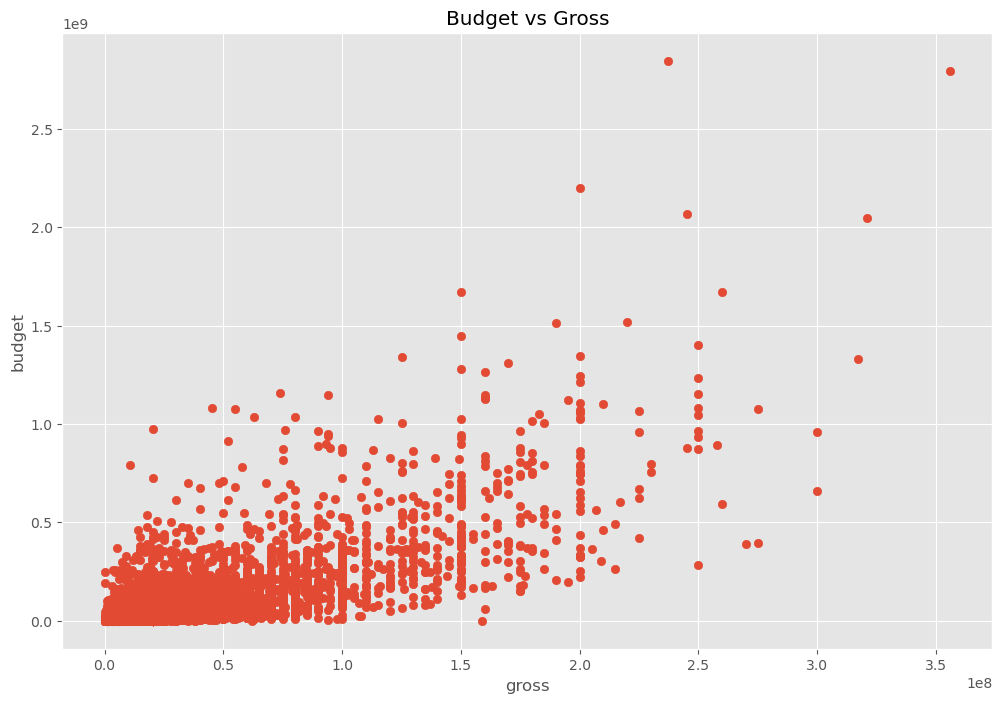

In [36]:
plt.scatter(df['budget'], df['gross'])

plt.title('Budget vs Gross')
plt.xlabel('gross')
plt.ylabel('budget')
plt.show()

<Axes: xlabel='budget', ylabel='gross'>

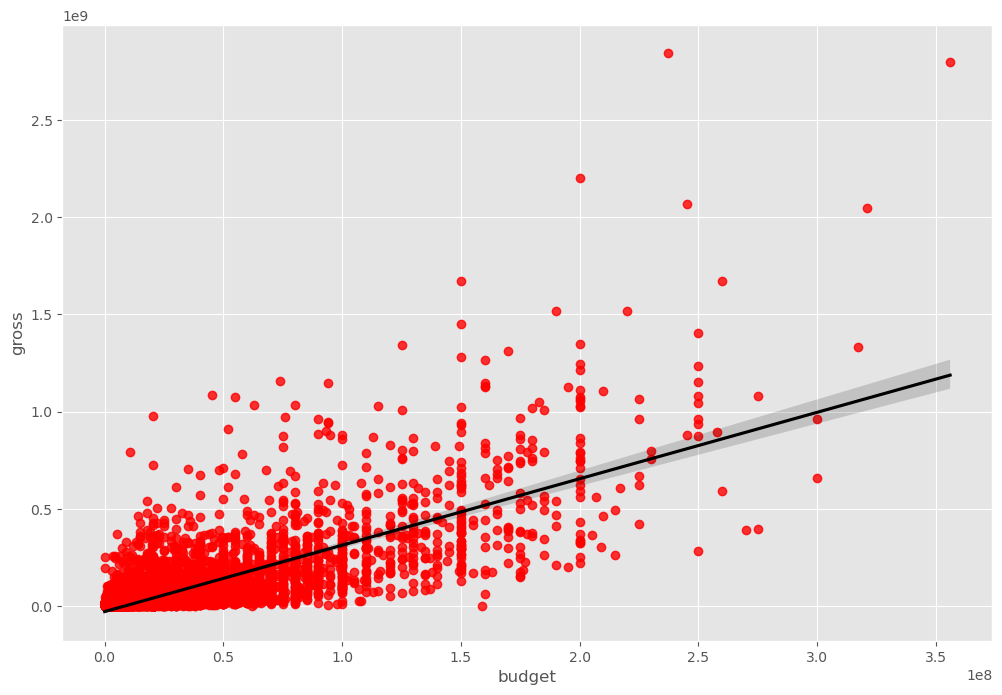

In [47]:
# Plot budget vs gross with seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "red"}, line_kws={"color":"black"})

In [52]:
df_numerized = df.copy()  # Create a copy of the original DataFrame 'df'

for col_name in df_numerized.columns:
    if df_numerized[col_name].dtype == 'object':
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes


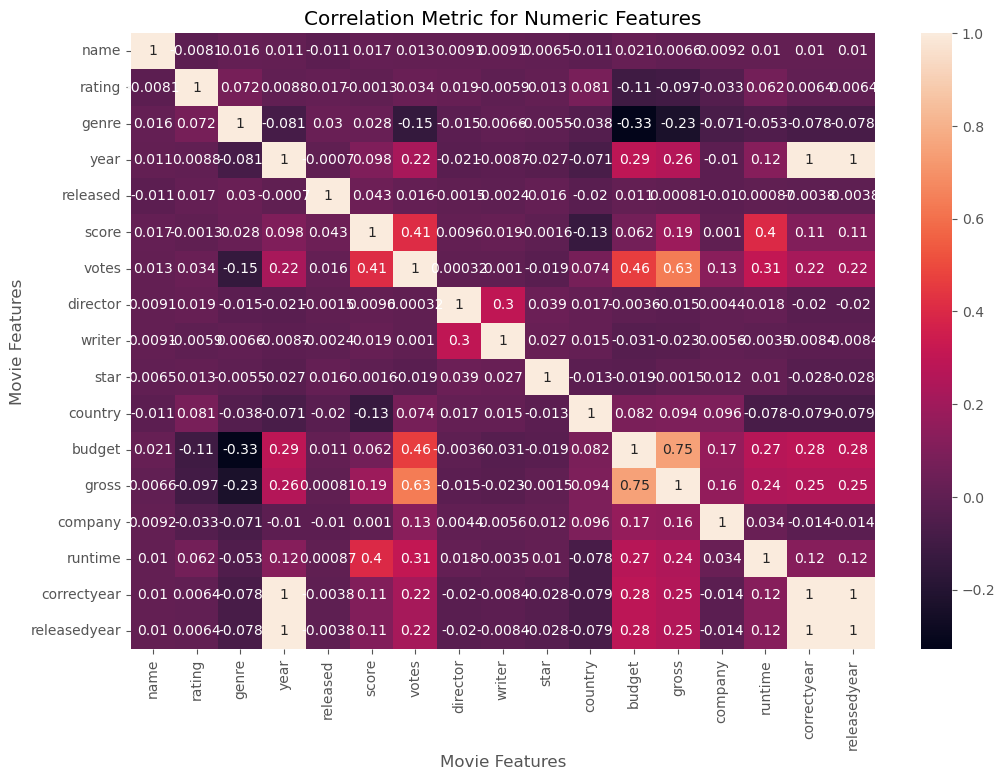

In [55]:
correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Metric for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

In [58]:
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

name          name            1.000000
              rating         -0.008069
              genre           0.016355
              year            0.011453
              released       -0.011311
              score           0.017097
              votes           0.013056
              director        0.009079
              writer          0.009081
              star            0.006472
              country        -0.010737
              budget          0.020921
              gross           0.006601
              company         0.009211
              runtime         0.010392
              correctyear     0.010225
              releasedyear    0.010225
rating        name           -0.008069
              rating          1.000000
              genre           0.072423
              year            0.008779
              released        0.016613
              score          -0.001314
              votes           0.033513
              director        0.019483
              writer     

In [60]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

genre         budget         -0.328484
budget        genre          -0.328484
gross         genre          -0.233385
genre         gross          -0.233385
              votes          -0.145291
votes         genre          -0.145291
country       score          -0.133348
score         country        -0.133348
rating        budget         -0.108776
budget        rating         -0.108776
rating        gross          -0.097213
gross         rating         -0.097213
year          genre          -0.081261
genre         year           -0.081261
correctyear   country        -0.079009
releasedyear  country        -0.079009
country       correctyear    -0.079009
              releasedyear   -0.079009
runtime       country        -0.078412
country       runtime        -0.078412
genre         correctyear    -0.078210
correctyear   genre          -0.078210
genre         releasedyear   -0.078210
releasedyear  genre          -0.078210
genre         company        -0.071067
company       genre      

In [61]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

gross         votes           0.632120
votes         gross           0.632120
gross         budget          0.745881
budget        gross           0.745881
correctyear   year            0.996397
year          releasedyear    0.996397
              correctyear     0.996397
releasedyear  year            0.996397
name          name            1.000000
writer        writer          1.000000
correctyear   correctyear     1.000000
rating        rating          1.000000
genre         genre           1.000000
year          year            1.000000
released      released        1.000000
score         score           1.000000
votes         votes           1.000000
correctyear   releasedyear    1.000000
director      director        1.000000
star          star            1.000000
country       country         1.000000
budget        budget          1.000000
gross         gross           1.000000
company       company         1.000000
runtime       runtime         1.000000
releasedyear  correctyear